In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator


from scipy.stats import spearmanr

In [2]:
%matplotlib notebook

# Plot Playground

This notebook is exploratory in nature and designed to look at various correlations in the early light curve data from the ZTF 2018 sample. 

In [3]:
info_path="../../forced_lightcurves/sample_lc_v2/"
salt_df = pd.read_csv(info_path + "../../Nobs_cut_salt2_spec_subtype_pec.csv")
res = pd.read_csv('results_40percent.csv')

The useful columns from this database for plotting purposes: 

    name –– ZTF name of the SN
    z_adopt –– redshift of the SN
    z_source –– where the redshift was identified
    x1_salt2 –– SALT shape parameter
    c_salt2 –– SALT color parameter
    dm15B_rest –– Delta M15 measured in the B band, in the SN rest frame
    Ia subtype –– the SN subtype
    B_abs0_SALT2corr –– B-band absolute mag
    t0 –– time of first light
    t_rise –– rise time of the SN
    alpha_g –– rising index in the g-band
    alpha_r –– rising index in the r-band

In [4]:
salt_df['Ia subtype'].unique()

array(['normal', 'normal*', '99aa-like', 'SC*', '91T-like*', 'Ia-CSM',
       '02cx-like', '86G-like', 'SC', '99aa-like*', '91T-like'],
      dtype=object)

In [5]:
normal = np.where((salt_df['Ia subtype'] != 'Ia-CSM') & 
                  (salt_df['Ia subtype'] != 'SC') & 
                  (salt_df['Ia subtype'] != 'SC*') & 
                  (salt_df['Ia subtype'] != '86G-like') & 
                  (salt_df['Ia subtype'] != '02cx-like'))
good = np.where((res.final_selection.values == 1))
has_host_z = np.where(salt_df.z_source != 'Msl')

normal_good = np.intersect1d(normal, good)
normal_good_host = np.intersect1d(normal_good, has_host_z)

# rearange for plotting
normal_plot = np.setdiff1d(normal[0], normal_good)
normal_good_plot = np.setdiff1d(normal_good, normal_good_host)

color_dict = {'orange': '#F0810F',
              'blueberry': '#063852',
              'dark navy': '#011A27'}

## Plots

In [6]:
t_rise = res['t_rise_50'].values
t_rise_unc = np.vstack((res['t_rise_50'] - res['t_rise_05'],
                    res['t_rise_95'] - res['t_rise_50'])) 
alpha_g = res['flat_alpha_g_50'].values
alpha_g_unc = np.vstack((res['flat_alpha_g_50'] - res['flat_alpha_g_05'],
                         res['flat_alpha_g_95'] - res['flat_alpha_g_50']))
alpha_r = res['flat_alpha_r_50'].values
alpha_r_unc = np.vstack((res['flat_alpha_r_50'] - res['flat_alpha_r_05'],
                         res['flat_alpha_r_95'] - res['flat_alpha_r_50']))

<IPython.core.display.Javascript object>


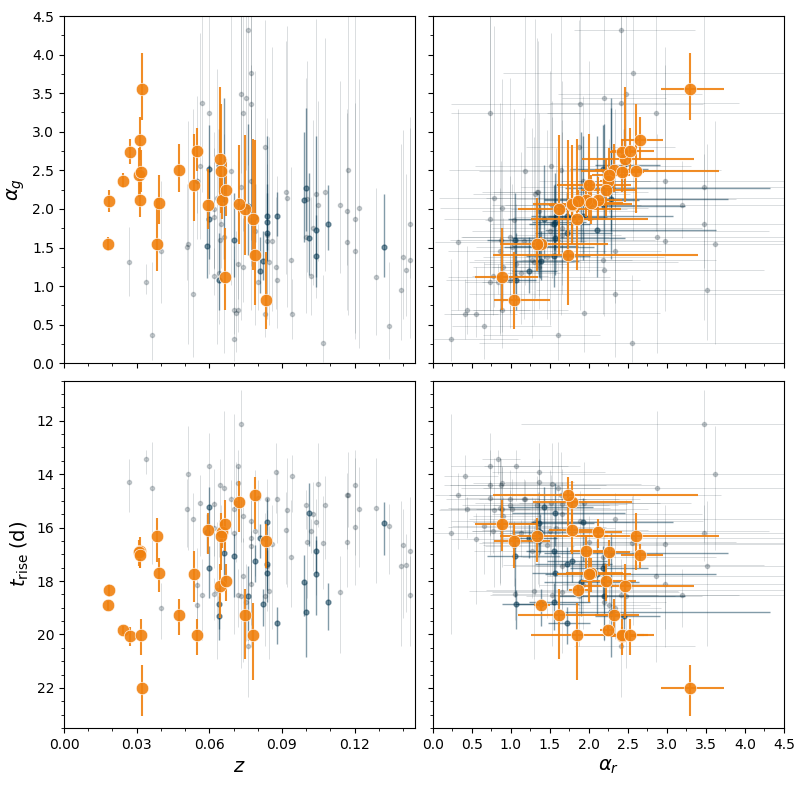

In [7]:
fig, axes = plt.subplots(2,2, figsize=(8,8))
#  alpha_g vs. redshift
axes[0,0].errorbar(salt_df.z_adopt.values[normal_plot], alpha_g[normal_plot], 
             yerr=alpha_g_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
axes[0,0].errorbar(salt_df.z_adopt.values[normal_good_plot], alpha_g[normal_good_plot], 
             yerr=alpha_g_unc[:,normal_good_plot], fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
axes[0,0].errorbar(salt_df.z_adopt.values[normal_good_host], alpha_g[normal_good_host], 
             yerr=alpha_g_unc[:,normal_good_host], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

#  rise vs. redshift
axes[1,0].errorbar(salt_df.z_adopt.values[normal_plot], t_rise[normal_plot], 
             yerr=t_rise_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
axes[1,0].errorbar(salt_df.z_adopt.values[normal_good_plot], t_rise[normal_good_plot], 
             yerr=t_rise_unc[:,normal_good_plot], fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
axes[1,0].errorbar(salt_df.z_adopt.values[normal_good_host], t_rise[normal_good_host], 
             yerr=t_rise_unc[:,normal_good_host], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

#  alpha_g vs. alpha_r
axes[0,1].errorbar(alpha_r[normal_plot], alpha_g[normal_plot], 
                   xerr=alpha_r_unc[:,normal_plot], 
                   yerr=alpha_g_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
axes[0,1].errorbar(alpha_r[normal_good_plot], alpha_g[normal_good_plot], 
                   xerr=alpha_r_unc[:,normal_good_plot], 
             yerr=alpha_g_unc[:,normal_good_plot], fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
axes[0,1].errorbar(alpha_r[normal_good_host], alpha_g[normal_good_host], 
                   xerr=alpha_r_unc[:,normal_good_host], 
             yerr=alpha_g_unc[:,normal_good_host], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

#  t_rise vs. alpha_r
axes[1,1].errorbar(alpha_r[normal_plot], t_rise[normal_plot], 
                   xerr=alpha_r_unc[:,normal_plot], 
                   yerr=t_rise_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
axes[1,1].errorbar(alpha_r[normal_good_plot], t_rise[normal_good_plot], 
                   xerr=alpha_r_unc[:,normal_good_plot], 
                   yerr=t_rise_unc[:,normal_good_plot], fmt='.',
                   color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
axes[1,1].errorbar(alpha_r[normal_good_host], t_rise[normal_good_host], 
                   xerr=alpha_r_unc[:,normal_good_host], 
                   yerr=t_rise_unc[:,normal_good_host], fmt='o', ms=9,
                   color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

for ax in axes[0,:]:
    ax.set_ylabel(r'$\alpha_g$', fontsize=14)
    ax.set_ylim(0,4.5)
    ax.yaxis.set_minor_locator(MultipleLocator(0.25))
    ax.yaxis.set_major_locator(MultipleLocator(0.5))

for ax in axes[1,:]:
    ax.set_ylabel(r'$t_\mathrm{rise}\;(\mathrm{d})$', fontsize=14)
    ax.set_ylim(23.5,10.5)
    ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    ax.yaxis.set_major_locator(MultipleLocator(2))

for ax in axes[:,0]:
    ax.set_xlabel(r'$z$', fontsize=14)
    ax.set_xlim(0,0.145)
    ax.xaxis.set_minor_locator(MultipleLocator(0.01))
    ax.xaxis.set_major_locator(MultipleLocator(0.03))

for ax in axes[:,1]:
    ax.set_xlabel(r'$\alpha_r$', fontsize=14)
    ax.set_xlim(0,4.5)
    ax.xaxis.set_minor_locator(MultipleLocator(0.25))
    ax.xaxis.set_major_locator(MultipleLocator(0.5))

for ax in axes[0,:]:
    ax.set_xticklabels([])
    ax.set_xlabel('')

for ax in axes[:,1]:
    ax.set_yticklabels([])
    ax.set_ylabel('')

# for ax in axes.flatten():
#     ax.tick_params(top=True,right=True,which='both', labelsize=11)
    
fig.subplots_adjust(top=0.98,right=0.98,left=0.08,bottom=0.09,hspace=0.05, wspace=0.05)
fig.savefig('../paper/figures/param_correlations.pdf')

<IPython.core.display.Javascript object>


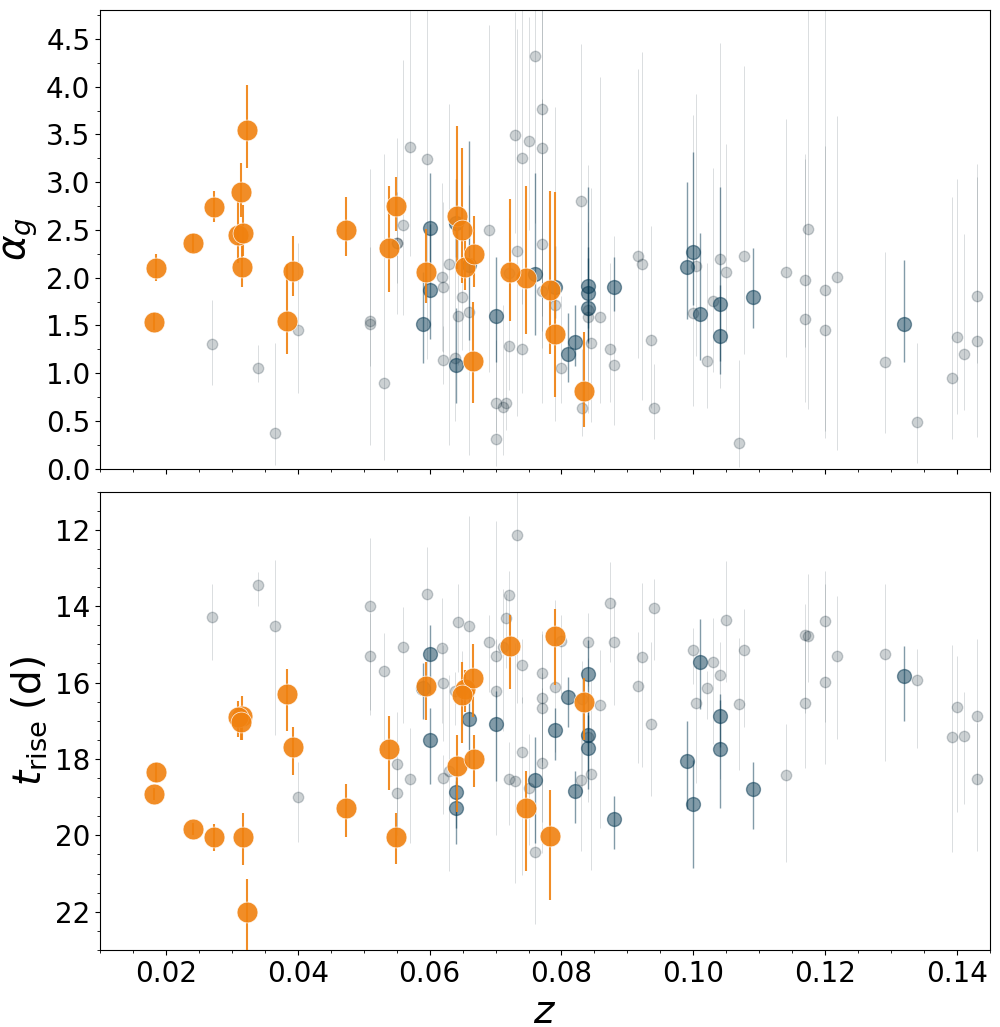

In [8]:
### Poster plot ###

fig, axes = plt.subplots(2,1, figsize=(10,10.27))
#  alpha_g vs. redshift
axes[0].errorbar(salt_df.z_adopt.values[normal_plot], alpha_g[normal_plot], 
             yerr=alpha_g_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, ms=15, alpha=0.2)
axes[0].errorbar(salt_df.z_adopt.values[normal_good_plot], alpha_g[normal_good_plot], 
             yerr=alpha_g_unc[:,normal_good_plot], fmt='.',
             color=color_dict['blueberry'], lw=1, ms=20, alpha=0.5)
axes[0].errorbar(salt_df.z_adopt.values[normal_good_host], alpha_g[normal_good_host], 
             yerr=alpha_g_unc[:,normal_good_host], fmt='o', ms=15,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

#  rise vs. redshift
axes[1].errorbar(salt_df.z_adopt.values[normal_plot], t_rise[normal_plot], 
             yerr=t_rise_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, ms=15, alpha=0.2)
axes[1].errorbar(salt_df.z_adopt.values[normal_good_plot], t_rise[normal_good_plot], 
             yerr=t_rise_unc[:,normal_good_plot], fmt='.',
             color=color_dict['blueberry'], lw=1, ms=20, alpha=0.5)
axes[1].errorbar(salt_df.z_adopt.values[normal_good_host], t_rise[normal_good_host], 
             yerr=t_rise_unc[:,normal_good_host], fmt='o', ms=15,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

axes[0].set_ylabel(r'$\alpha_g$', fontsize=28)
axes[0].set_ylim(0,4.8)
axes[0].yaxis.set_minor_locator(MultipleLocator(0.25))
axes[0].yaxis.set_major_locator(MultipleLocator(0.5))

axes[1].set_ylabel(r'$t_\mathrm{rise}\;(\mathrm{d})$', fontsize=28)
axes[1].set_ylim(23,11)
axes[1].yaxis.set_minor_locator(MultipleLocator(0.5))
axes[1].yaxis.set_major_locator(MultipleLocator(2))


axes[1].set_xlabel(r'$z$', fontsize=28)
for ax in axes:
    ax.set_xlim(0.01,0.145)
    ax.xaxis.set_minor_locator(MultipleLocator(0.005))
    ax.xaxis.set_major_locator(MultipleLocator(0.02))

axes[0].set_xticklabels([])
axes[0].set_xlabel('')

for ax in axes:
    ax.tick_params(which='both', labelsize=20)
    
fig.subplots_adjust(top=0.99,right=0.99,left=0.1,bottom=0.075,hspace=0.05, wspace=0.05)
fig.savefig('poster_param_correlations.pdf')

for ax in axes:
    ax.axvspan(0,1e4, facecolor='white')
# fig1.subplots_adjust(left=0.075,bottom=0.145,top=0.98,right=0.98)
fig.savefig('poster_param_correlations.png', transparent=True)

<IPython.core.display.Javascript object>


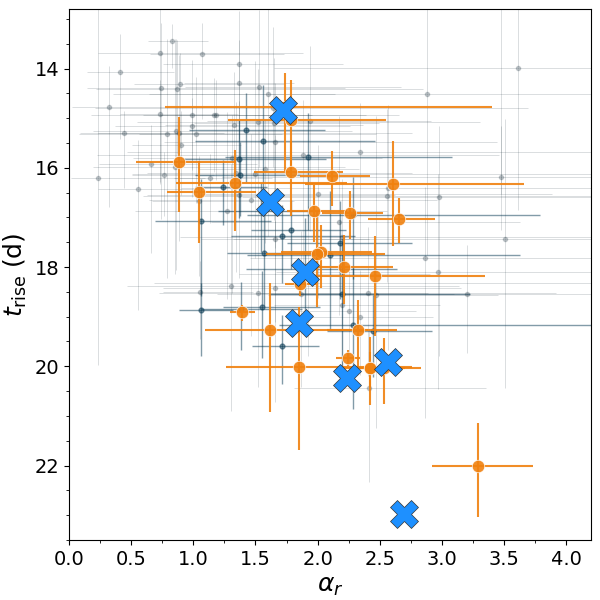

In [9]:
### Talk plot ###

fig, ax = plt.subplots(figsize=(6,6))

#  t_rise vs. alpha_r
ax.errorbar(alpha_r[normal_plot], t_rise[normal_plot], 
                   xerr=alpha_r_unc[:,normal_plot], 
                   yerr=t_rise_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
ax.errorbar(alpha_r[normal_good_plot], t_rise[normal_good_plot], 
                   xerr=alpha_r_unc[:,normal_good_plot], 
                   yerr=t_rise_unc[:,normal_good_plot], fmt='.',
                   color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
ax.errorbar(alpha_r[normal_good_host], t_rise[normal_good_host], 
                   xerr=alpha_r_unc[:,normal_good_host], 
                   yerr=t_rise_unc[:,normal_good_host], fmt='o', ms=9,
                   color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

good_df = pd.read_csv('good_models.cat', 
                     delim_whitespace=True, header=None, 
                     names=['rise','alpha_r'])
ax.plot(good_df.alpha_r.values, 
        good_df.rise.values, 
        'X', color='DodgerBlue', ms=20,  
        mec='0.2', mew=0.5, zorder=100)
 

ax.set_xlabel(r'$\alpha_r$', fontsize=18)
ax.set_xlim(0,4.2)
ax.xaxis.set_minor_locator(MultipleLocator(0.25))
ax.xaxis.set_major_locator(MultipleLocator(0.5))

ax.set_ylabel(r'$t_\mathrm{rise}\;(\mathrm{d})$', fontsize=18)
ax.set_ylim(23.5,12.8)
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.tick_params(labelsize=14)

fig.subplots_adjust(left=0.115,right=0.985,top=0.985,bottom=0.1)

<IPython.core.display.Javascript object>


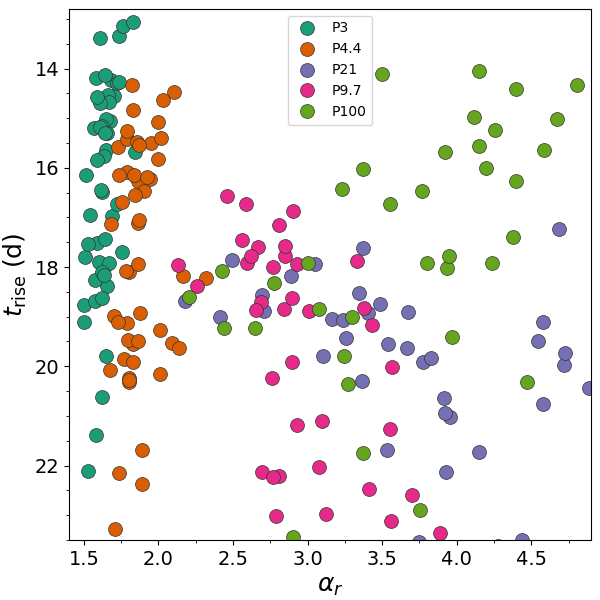

In [10]:
### Talk plot - Magee+20 data ###

all_df = pd.read_csv('all_models.cat', 
                     delim_whitespace=True, header=None, 
                     names=['rise','alpha_r','s'])

fig, ax = plt.subplots(figsize=(6,6))

#  t_rise vs. alpha_r
for s, col in zip([3, 4.4, 21, 9.7, 100],
                  ['#1b9e77', '#d95f02', 
                   '#7570b3', '#e7298a',
                   '#66a61e']):
    this_mix = np.where(all_df.s.values == s)
    ax.plot(all_df.alpha_r.values[this_mix], 
            all_df.rise.values[this_mix], 
            'o', color=col, label='P{}'.format(s),
            mec='0.2', mew=0.5, ms=10)
    
ax.set_xlabel(r'$\alpha_r$', fontsize=18)
ax.set_xlim(1.4,4.9)
ax.xaxis.set_minor_locator(MultipleLocator(0.25))
ax.xaxis.set_major_locator(MultipleLocator(0.5))

ax.set_ylabel(r'$t_\mathrm{rise}\;(\mathrm{d})$', fontsize=18)
ax.set_ylim(23.5,12.8)
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.tick_params(labelsize=14)

ax.legend()

fig.subplots_adjust(left=0.115,right=0.985,top=0.985,bottom=0.1)

In [11]:
print('Correlating redshift and alpha_g:')
rho, p = spearmanr(salt_df.z_adopt.values[normal_good_host], alpha_g[normal_good_host])
print('\tFor good w/ hosts: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(salt_df.z_adopt.values[normal_good], alpha_g[normal_good])
print('\tFor good: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(salt_df.z_adopt.values[normal], alpha_g[normal])
print('\tFor all: rho = {:.4f}, p = {:.4f}'.format(rho, p))

print('Correlating redshift and alpha_r:')
rho, p = spearmanr(salt_df.z_adopt.values[normal_good_host], alpha_r[normal_good_host])
print('\tFor good w/ hosts: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(salt_df.z_adopt.values[normal_good], alpha_r[normal_good])
print('\tFor good: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(salt_df.z_adopt.values[normal], alpha_r[normal])
print('\tFor all: rho = {:.4f}, p = {:.4f}'.format(rho, p))

print('Correlating alpha_g and alpha_r:')
rho, p = spearmanr(alpha_g[normal_good_host], alpha_r[normal_good_host])
print('\tFor good w/ hosts: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(alpha_g[normal_good], alpha_r[normal_good])
print('\tFor good: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(alpha_g[normal], alpha_r[normal])
print('\tFor all: rho = {:.4f}, p = {:.4f}'.format(rho, p))

print('Correlating redshift and rise time:')
rho, p = spearmanr(salt_df.z_adopt.values[normal_good_host], t_rise[normal_good_host])
print('\tFor good w/ hosts: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(salt_df.z_adopt.values[normal_good], t_rise[normal_good])
print('\tFor good: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(salt_df.z_adopt.values[normal], t_rise[normal])
print('\tFor all: rho = {:.4f}, p = {:.4f}'.format(rho, p))

print('Correlating alpha_g and rise time:')
rho, p = spearmanr(alpha_g[normal_good_host], t_rise[normal_good_host])
print('\tFor good w/ hosts: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(alpha_g[normal_good], t_rise[normal_good])
print('\tFor good: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(alpha_g[normal], t_rise[normal])
print('\tFor all: rho = {:.4f}, p = {:.4f}'.format(rho, p))

print('Correlating alpha_r and rise time:')
rho, p = spearmanr(alpha_r[normal_good_host], t_rise[normal_good_host])
print('\tFor good w/ hosts: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(alpha_r[normal_good], t_rise[normal_good])
print('\tFor good: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(alpha_r[normal], t_rise[normal])
print('\tFor all: rho = {:.4f}, p = {:.4f}'.format(rho, p))


Correlating redshift and alpha_g:
	For good w/ hosts: rho = -0.4354, p = 0.0296
	For good: rho = -0.5128, p = 0.0002
	For all: rho = -0.2645, p = 0.0035
Correlating redshift and alpha_r:
	For good w/ hosts: rho = -0.3500, p = 0.0863
	For good: rho = -0.3923, p = 0.0064
	For all: rho = -0.3044, p = 0.0007
Correlating alpha_g and alpha_r:
	For good w/ hosts: rho = 0.9677, p = 0.0000
	For good: rho = 0.9340, p = 0.0000
	For all: rho = 0.5503, p = 0.0000
Correlating redshift and rise time:
	For good w/ hosts: rho = -0.4138, p = 0.0397
	For good: rho = -0.2413, p = 0.1022
	For all: rho = -0.1600, p = 0.0808
Correlating alpha_g and rise time:
	For good w/ hosts: rho = 0.5508, p = 0.0043
	For good: rho = 0.4350, p = 0.0022
	For all: rho = 0.3836, p = 0.0000
Correlating alpha_r and rise time:
	For good w/ hosts: rho = 0.5085, p = 0.0095
	For good: rho = 0.4295, p = 0.0026
	For all: rho = 0.4943, p = 0.0000


## $X_1$ vs. $\alpha$ and $X_1$ vs. rise time

Redefine the redshift cuts below in order to highlight the region where we are "complete" vs. the region where we are not.

In [12]:
z_cut = 0.06
low_cut = 0.04
high_cut = 0.065
low_z = np.where(salt_df.z_adopt < z_cut)
# mid_z = np.where((low_cut < salt_df.z_adopt) & (salt_df.z_adopt <= high_cut))
high_z = np.where(salt_df.z_adopt >= z_cut)

good_host_low_z = np.intersect1d(normal_good_host, low_z[0])
# good_host_mid_z = np.intersect1d(normal_good_host, mid_z[0])
good_host_high_z = np.intersect1d(normal_good_host, high_z[0])

<IPython.core.display.Javascript object>


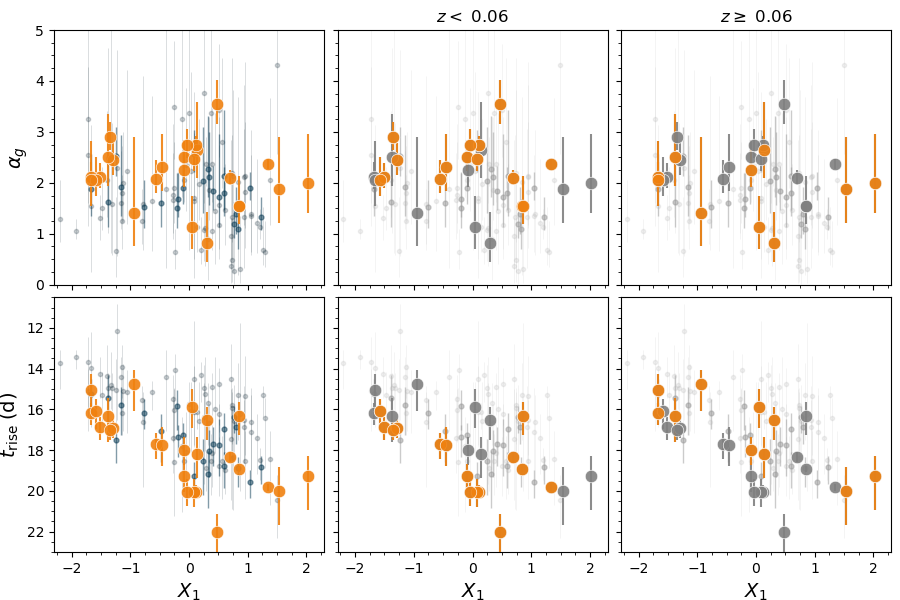

In [13]:
fig, axes = plt.subplots(2,3, sharex=True, sharey=False, figsize=(9,6))


axes[0,0].errorbar(salt_df.x1_salt2.values[normal_plot], alpha_g[normal_plot], 
             yerr=alpha_g_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
axes[0,0].errorbar(salt_df.x1_salt2.values[normal_good_plot], alpha_g[normal_good_plot], 
             yerr=alpha_g_unc[:,normal_good_plot], fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
axes[0,0].errorbar(salt_df.x1_salt2.values[normal_good_host], alpha_g[normal_good_host], 
             yerr=alpha_g_unc[:,normal_good_host], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
axes[0,0].set_ylabel(r'$\alpha_g$', fontsize=14)

for ax in axes[0,1:]:
    ax.errorbar(salt_df.x1_salt2.values[normal_plot], alpha_g[normal_plot], 
                 yerr=alpha_g_unc[:,normal_plot], fmt='.', 
                  color='0.7', lw=0.5, alpha=0.2)
    ax.errorbar(salt_df.x1_salt2.values[normal_good_plot], alpha_g[normal_good_plot], 
                 yerr=alpha_g_unc[:,normal_good_plot], fmt='.',
                 color='0.6', lw=1, ms=7, alpha=0.5)
    ax.errorbar(salt_df.x1_salt2.values[normal_good_host], alpha_g[normal_good_host], 
                 yerr=alpha_g_unc[:,normal_good_host], fmt='o', ms=9,
                 color='0.5', mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
#     ax.set_xlabel(r'$X_1$', fontsize=14)

axes[0,1].errorbar(salt_df.x1_salt2.values[good_host_low_z], alpha_g[good_host_low_z], 
             yerr=alpha_g_unc[:,good_host_low_z], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
axes[0,1].set_title(r'$z <$ {}'.format(z_cut),fontsize=12)
# axes[0,2].errorbar(salt_df.x1_salt2.values[good_host_mid_z], alpha_g[good_host_mid_z], 
#              yerr=alpha_g_unc[:,good_host_mid_z], fmt='o', ms=9,
#              color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
# axes[0,2].set_title(r'{} $< z \leq$ {}'.format(low_cut, high_cut),fontsize=12)
axes[0,2].errorbar(salt_df.x1_salt2.values[good_host_high_z], alpha_g[good_host_high_z], 
             yerr=alpha_g_unc[:,good_host_high_z], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
axes[0,2].set_title(r'$z \geq$ {}'.format(z_cut),fontsize=12)

axes[1,0].errorbar(salt_df.x1_salt2.values[normal_plot], t_rise[normal_plot], 
             yerr=t_rise_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
axes[1,0].errorbar(salt_df.x1_salt2.values[normal_good_plot], t_rise[normal_good_plot], 
             yerr=t_rise_unc[:,normal_good_plot], fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
axes[1,0].errorbar(salt_df.x1_salt2.values[normal_good_host], t_rise[normal_good_host], 
             yerr=t_rise_unc[:,normal_good_host], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
axes[1,0].set_ylim(23,10)
axes[1,0].set_ylabel(r'$t_\mathrm{rise}\;(\mathrm{d})$', fontsize=14)

for ax in axes[1,1:]:
    ax.errorbar(salt_df.x1_salt2.values[normal_plot], t_rise[normal_plot], 
                yerr=t_rise_unc[:,normal_plot], fmt='.', 
                color='0.7', lw=0.5, alpha=0.2)
    ax.errorbar(salt_df.x1_salt2.values[normal_good_plot], t_rise[normal_good_plot], 
                yerr=t_rise_unc[:,normal_good_plot], fmt='.',
                color='0.6', lw=1, ms=7, alpha=0.5)
    ax.errorbar(salt_df.x1_salt2.values[normal_good_host], t_rise[normal_good_host], 
                yerr=t_rise_unc[:,normal_good_host], fmt='o', ms=9,
                color='0.5', mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
    ax.set_xlabel(r'$X_1$', fontsize=14)
    ax.set_ylim(23,10)

axes[1,1].errorbar(salt_df.x1_salt2.values[good_host_low_z], t_rise[good_host_low_z], 
             yerr=t_rise_unc[:,good_host_low_z], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
# axes[1,2].errorbar(salt_df.x1_salt2.values[good_host_mid_z], t_rise[good_host_mid_z], 
#              yerr=t_rise_unc[:,good_host_mid_z], fmt='o', ms=9,
#              color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
axes[1,2].errorbar(salt_df.x1_salt2.values[good_host_high_z], t_rise[good_host_high_z], 
             yerr=t_rise_unc[:,good_host_high_z], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)


for axnum, ax in enumerate(axes[0,:]):
    ax.set_ylim(0,5)
    ax.yaxis.set_minor_locator(MultipleLocator(0.25))
    ax.yaxis.set_major_locator(MultipleLocator(1))
    if axnum > 0:
        ax.set_yticklabels([])

for axnum, ax in enumerate(axes[1,:]):
    ax.set_ylim(23,10.5)
    ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    ax.yaxis.set_major_locator(MultipleLocator(2))
    if axnum > 0:
        ax.set_yticklabels([])
        

axes[1,0].set_xlabel(r'$X_1$', fontsize=14)
axes[0,0].set_xlim(-2.3,2.3)
axes[0,0].xaxis.set_minor_locator(MultipleLocator(0.25))
axes[0,0].xaxis.set_major_locator(MultipleLocator(1))

fig.subplots_adjust(left=0.06,right=0.99,top=0.95,bottom=0.08,wspace=0.05,hspace=0.05)
fig.savefig('../paper/figures/shape_correlations.pdf')

In [14]:
print('Correlating X1 and rise time:')
rho, p = spearmanr(salt_df.x1_salt2.values[normal_good_host], t_rise[normal_good_host])
print('\tFor good w/ hosts: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(salt_df.x1_salt2.values[normal_good], t_rise[normal_good])
print('\tFor good: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(salt_df.x1_salt2.values[normal], t_rise[normal])
print('\tFor all: rho = {:.4f}, p = {:.4f}'.format(rho, p))

print('Correlating X1 and alpha_g:')
rho, p = spearmanr(salt_df.x1_salt2.values[normal_good_host], alpha_g[normal_good_host])
print('\tFor good w/ hosts: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(salt_df.x1_salt2.values[normal_good], alpha_g[normal_good])
print('\tFor good: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(salt_df.x1_salt2.values[normal], alpha_g[normal])
print('\tFor all: rho = {:.4f}, p = {:.4f}'.format(rho, p))

print('Correlating X1 and alpha_r:')
rho, p = spearmanr(salt_df.x1_salt2.values[normal_good_host], alpha_r[normal_good_host])
print('\tFor good w/ hosts: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(salt_df.x1_salt2.values[normal_good], alpha_r[normal_good])
print('\tFor good: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(salt_df.x1_salt2.values[normal], alpha_r[normal])
print('\tFor all: rho = {:.4f}, p = {:.4f}'.format(rho, p))


Correlating X1 and rise time:
	For good w/ hosts: rho = 0.5985, p = 0.0016
	For good: rho = 0.6104, p = 0.0000
	For all: rho = 0.5097, p = 0.0000
Correlating X1 and alpha_g:
	For good w/ hosts: rho = -0.1608, p = 0.4427
	For good: rho = -0.2391, p = 0.1055
	For all: rho = -0.1999, p = 0.0286
Correlating X1 and alpha_r:
	For good w/ hosts: rho = -0.1977, p = 0.3435
	For good: rho = -0.1850, p = 0.2131
	For all: rho = -0.0736, p = 0.4245


In [15]:
outlier_high = np.where((t_rise < 16.5) & (salt_df.z_source != 'Msl') & (res.final_selection == 1) & 
                        (salt_df.x1_salt2.values > 0.75) & (salt_df.x1_salt2.values <1))
outlier_low = np.where((t_rise > 21) & (salt_df.z_adopt < 0.04))

print('{} (z = {}) has short rise'.format(salt_df.name.iloc[outlier_high].values[0], 
                                          salt_df.z_adopt.iloc[outlier_high].values[0]))

print('{} has high alpha and really long rise'.format(salt_df.name.iloc[outlier_low].values[0]))

ZTF18abkhcrj (z = 0.03829) has short rise
ZTF18abfhryc has high alpha and really long rise


## $\Delta m_{g,15}$ vs. rise time

In [16]:
dm15_df = pd.read_csv('dm15gpars.dat', sep=' ')
dm15_df.head()

,name,dm15g,dm15g_unc
0,ZTF18aailmnv,0.774,0.081
1,ZTF18aansqun,1.136,0.044
2,ZTF18aaoxryq,0.835,0.048
3,ZTF18aapqwyv,1.468,0.101
4,ZTF18aapsedq,0.994,0.142


In [17]:
dm15 = np.zeros(len(salt_df))
dm15_unc = np.zeros_like(dm15)

for sn_num, sn in enumerate(salt_df.name):
    dm_idx = np.where(dm15_df.name == sn)
    if len(dm_idx[0]) > 0:
        dm15[sn_num] = dm15_df.dm15g.iloc[dm_idx]
        dm15_unc[sn_num] = dm15_df.dm15g_unc.iloc[dm_idx]

good_dm15 = np.where((dm15 > 0) & 
                     (dm15/dm15_unc > 4))

/Users/adamamiller/miniconda3/envs/emcee3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/Users/adamamiller/miniconda3/envs/emcee3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()


In [18]:
z_cut = 0.06
low_cut = 0.04
high_cut = 0.065
low_z = np.where(salt_df.z_adopt < z_cut)
# mid_z = np.where((low_cut < salt_df.z_adopt) & (salt_df.z_adopt <= high_cut))
high_z = np.where(salt_df.z_adopt >= z_cut)

good_host_low_z = np.intersect1d(np.intersect1d(good_dm15,normal_good_host), low_z[0])
# good_host_mid_z = np.intersect1d(normal_good_host, mid_z[0])
good_host_high_z = np.intersect1d(np.intersect1d(good_dm15,normal_good_host), high_z[0])

<IPython.core.display.Javascript object>


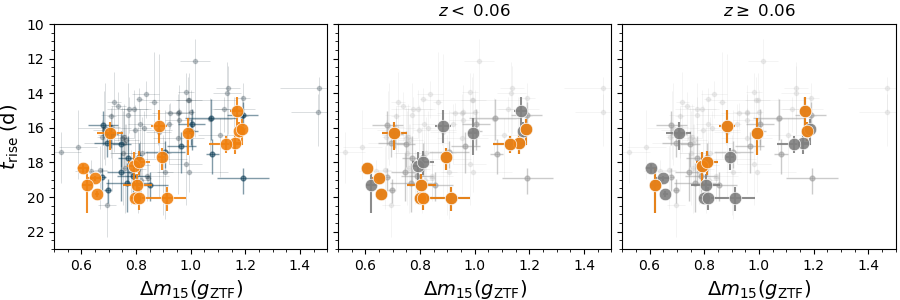

In [19]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3, sharex=True, sharey=True, figsize=(9,3))

#  rise vs. redshift
ax0.errorbar(dm15[np.intersect1d(good_dm15, normal_plot)], 
            t_rise[np.intersect1d(good_dm15, normal_plot)], 
            yerr=t_rise_unc[:,np.intersect1d(good_dm15, normal_plot)], 
            xerr=dm15_unc[np.intersect1d(good_dm15, normal_plot)],
            fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
ax0.errorbar(dm15[np.intersect1d(good_dm15, normal_good_plot)], 
            t_rise[np.intersect1d(good_dm15, normal_good_plot)], 
            yerr=t_rise_unc[:,np.intersect1d(good_dm15, normal_good_plot)], 
            xerr=dm15_unc[np.intersect1d(good_dm15, normal_good_plot)], 
            fmt='.',
            color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
ax0.errorbar(dm15[np.intersect1d(good_dm15,normal_good_host)], 
            t_rise[np.intersect1d(good_dm15,normal_good_host)], 
            yerr=t_rise_unc[:,np.intersect1d(good_dm15,normal_good_host)], 
            xerr=dm15_unc[np.intersect1d(good_dm15,normal_good_host)], 
            fmt='o', ms=9,
            color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

for ax in [ax1, ax2]:
    ax.errorbar(dm15[np.intersect1d(good_dm15, normal_plot)], 
                t_rise[np.intersect1d(good_dm15, normal_plot)], 
                yerr=t_rise_unc[:,np.intersect1d(good_dm15, normal_plot)], 
                xerr=dm15_unc[np.intersect1d(good_dm15, normal_plot)],
                fmt='.', 
                color='0.7', lw=0.5, alpha=0.2)
    ax.errorbar(dm15[np.intersect1d(good_dm15, normal_good_plot)], 
                t_rise[np.intersect1d(good_dm15, normal_good_plot)], 
                yerr=t_rise_unc[:,np.intersect1d(good_dm15, normal_good_plot)], 
                xerr=dm15_unc[np.intersect1d(good_dm15, normal_good_plot)], 
                fmt='.',
                color='0.6', lw=1, ms=7, alpha=0.5)
    ax.errorbar(dm15[np.intersect1d(good_dm15,normal_good_host)], 
                t_rise[np.intersect1d(good_dm15,normal_good_host)], 
                yerr=t_rise_unc[:,np.intersect1d(good_dm15,normal_good_host)], 
                xerr=dm15_unc[np.intersect1d(good_dm15,normal_good_host)], 
                fmt='o', ms=9,
                color='0.5', mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
    ax.set_xlabel(r'$\Delta m_{15}(g_\mathrm{ZTF})$', fontsize=14)

ax1.errorbar(dm15[good_host_low_z], 
            t_rise[good_host_low_z], 
            yerr=t_rise_unc[:,good_host_low_z], 
            xerr=dm15_unc[good_host_low_z], 
            fmt='o', ms=9,
            color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
ax1.set_title(r'$z <$ {}'.format(z_cut),fontsize=12)
ax2.errorbar(dm15[good_host_high_z], 
            t_rise[good_host_high_z], 
            yerr=t_rise_unc[:,good_host_high_z], 
            xerr=dm15_unc[good_host_high_z], 
            fmt='o', ms=9,
            color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
ax2.set_title(r'$z \geq$ {}'.format(z_cut),fontsize=12)

ax0.set_ylabel(r'$t_\mathrm{rise}\;(\mathrm{d})$', fontsize=14)
ax0.set_ylim(23,10)
ax0.yaxis.set_minor_locator(MultipleLocator(0.5))
ax0.yaxis.set_major_locator(MultipleLocator(2))

ax0.set_xlabel(r'$\Delta m_{15}(g_\mathrm{ZTF})$', fontsize=14)
ax0.set_xlim(0.5,1.5)
ax0.xaxis.set_minor_locator(MultipleLocator(0.05))
ax0.xaxis.set_major_locator(MultipleLocator(0.2))

fig.subplots_adjust(left=0.06,right=0.995,bottom=0.17,top=0.92,wspace=0.04)
fig.savefig('../paper/figures/dm15_rise.pdf')

In [20]:
print('Correlating dm15 and rise time:')
rho, p = spearmanr(dm15[np.intersect1d(normal_good_host, good_dm15)], t_rise[np.intersect1d(normal_good_host, good_dm15)])
print('\tFor good w/ hosts: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(dm15[np.intersect1d(normal_good, good_dm15)], t_rise[np.intersect1d(normal_good, good_dm15)])
print('\tFor good: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(dm15[np.intersect1d(normal, good_dm15)], t_rise[np.intersect1d(normal, good_dm15)])
print('\tFor all: rho = {:.4f}, p = {:.4f}'.format(rho, p))


print('Correlating dm15 and rise time (for good host low-z:')
rho, p = spearmanr(dm15[good_host_low_z], t_rise[good_host_low_z])
print('\tFor good host low-z: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(dm15[good_host_high_z], t_rise[good_host_high_z])
print('\tFor good host high-z: rho = {:.4f}, p = {:.4f}'.format(rho, p))


Correlating dm15 and rise time:
	For good w/ hosts: rho = -0.5789, p = 0.0094
	For good: rho = -0.4537, p = 0.0037
	For all: rho = -0.4205, p = 0.0000
Correlating dm15 and rise time (for good host low-z:
	For good host low-z: rho = -0.3636, p = 0.2453
	For good host high-z: rho = -0.8214, p = 0.0234


<IPython.core.display.Javascript object>


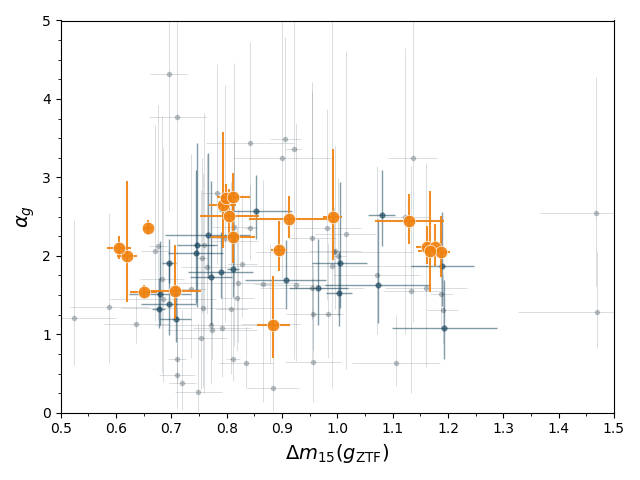

In [21]:
fig, ax = plt.subplots()

ax.errorbar(dm15[np.intersect1d(good_dm15, normal_plot)], 
            alpha_g[np.intersect1d(good_dm15, normal_plot)], 
            yerr=alpha_g_unc[:,np.intersect1d(good_dm15, normal_plot)], 
            xerr=dm15_unc[np.intersect1d(good_dm15, normal_plot)],
            fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
ax.errorbar(dm15[np.intersect1d(good_dm15, normal_good_plot)], 
            alpha_g[np.intersect1d(good_dm15, normal_good_plot)], 
            yerr=alpha_g_unc[:,np.intersect1d(good_dm15, normal_good_plot)], 
            xerr=dm15_unc[np.intersect1d(good_dm15, normal_good_plot)], 
            fmt='.',
            color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
ax.errorbar(dm15[np.intersect1d(good_dm15,normal_good_host)], 
            alpha_g[np.intersect1d(good_dm15,normal_good_host)], 
            yerr=alpha_g_unc[:,np.intersect1d(good_dm15,normal_good_host)], 
            xerr=dm15_unc[np.intersect1d(good_dm15,normal_good_host)], 
            fmt='o', ms=9,
            color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

ax.set_ylabel(r'$\alpha_g$', fontsize=14)
ax.set_ylim(0,5)
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.yaxis.set_major_locator(MultipleLocator(1))

ax.set_xlabel(r'$\Delta m_{15}(g_\mathrm{ZTF})$', fontsize=14)
ax.set_xlim(0.5,1.5)
ax.xaxis.set_minor_locator(MultipleLocator(0.05))
ax.xaxis.set_major_locator(MultipleLocator(0.1))

fig.tight_layout()

### Alternative dm15 measurement

In [91]:
kcorr_df = pd.read_csv('dm15_kcorr.txt')
kcorr_df.head()

,name,order,tmax_16,tmax,tmax_84,dm15_16,dm15,dm15_84,dm15_yy_16,dm15_yy,dm15_yy_84,good,really_good
0,ZTF18abckujg,quad,0.9399,1.2521,1.5667,0.7444,0.7947,0.8467,0.6264,0.6611,0.6964,1,1
1,ZTF18abkigee,quad,0.0362,1.7407,2.9583,0.4408,0.5464,0.6477,0.3615,0.4207,0.4761,1,0
2,ZTF18abfgygp,cubic,0.6521,0.7900,0.9387,0.7834,0.8138,0.8462,0.7182,0.7429,0.7680,1,1
3,ZTF18aasdted,cubic,1.0069,1.2292,1.4373,0.6683,0.6914,0.7130,0.5723,0.5887,0.6049,1,1
4,ZTF18aapqwyv,cubic,0.0859,0.3023,0.5151,1.1788,1.2314,1.2896,1.1515,1.2055,1.2688,1,1


In [111]:
# remove the 86G like SN from the sample
kcorr_df.loc[82, 'good'] = 0
kcorr_df.loc[82, 'really_good'] = 0

In [121]:
dm15_yy = np.zeros(len(salt_df))
dm15_yy_unc = np.zeros_like(t_rise_unc)
dm15_yy_16 = np.zeros_like(dm15_yy)
dm15_yy_84 = np.zeros_like(dm15_yy)
good_coverage = np.zeros_like(dm15_yy)

for sn_num, sn in enumerate(salt_df.name):
    dm_idx = np.where(kcorr_df.name == sn)
    if len(dm_idx[0]) > 0:
        dm15_yy[sn_num] = kcorr_df.dm15_yy.iloc[dm_idx]
        dm15_yy_unc[:,sn_num] = np.array(kcorr_df.dm15_yy.iloc[dm_idx] - kcorr_df.dm15_yy_16.iloc[dm_idx],
                                         kcorr_df.dm15_yy_84.iloc[dm_idx] - kcorr_df.dm15_yy.iloc[dm_idx])
        dm15_yy_16[sn_num] = kcorr_df.dm15_yy_16.iloc[dm_idx]
        dm15_yy_84[sn_num] = kcorr_df.dm15_yy_84.iloc[dm_idx]
        good_coverage[sn_num] = kcorr_df.good.iloc[dm_idx]
        
good_dm15_yy = np.where(good_coverage)

In [122]:
good_host_low_z = np.intersect1d(np.intersect1d(good_dm15_yy,normal_good_host), low_z[0])
# good_host_mid_z = np.intersect1d(normal_good_host, mid_z[0])
good_host_high_z = np.intersect1d(np.intersect1d(good_dm15_yy,normal_good_host), high_z[0])

<IPython.core.display.Javascript object>


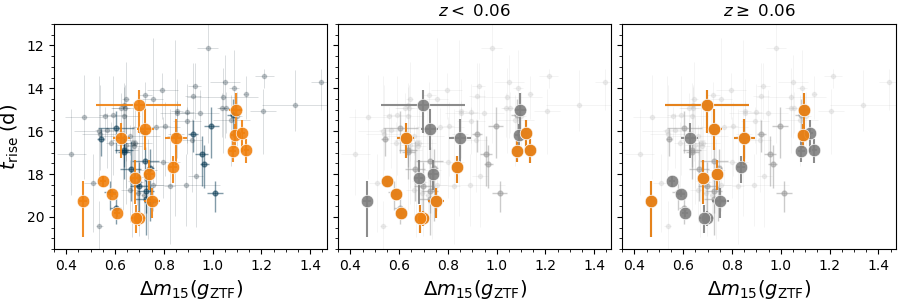

In [125]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3, sharex=True, sharey=True, figsize=(9,3))

#  rise vs. redshift
ax0.errorbar(dm15_yy[np.intersect1d(good_dm15_yy, normal_plot)], 
            t_rise[np.intersect1d(good_dm15_yy, normal_plot)], 
            yerr=t_rise_unc[:,np.intersect1d(good_dm15_yy, normal_plot)], 
            xerr=dm15_yy_unc[:,np.intersect1d(good_dm15_yy, normal_plot)],
            fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
ax0.errorbar(dm15_yy[np.intersect1d(good_dm15_yy, normal_good_plot)], 
            t_rise[np.intersect1d(good_dm15_yy, normal_good_plot)], 
            yerr=t_rise_unc[:,np.intersect1d(good_dm15_yy, normal_good_plot)], 
            xerr=dm15_yy_unc[:,np.intersect1d(good_dm15_yy, normal_good_plot)], 
            fmt='.',
            color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
ax0.errorbar(dm15_yy[np.intersect1d(good_dm15_yy,normal_good_host)], 
            t_rise[np.intersect1d(good_dm15_yy,normal_good_host)], 
            yerr=t_rise_unc[:,np.intersect1d(good_dm15_yy,normal_good_host)], 
            xerr=dm15_yy_unc[:,np.intersect1d(good_dm15_yy,normal_good_host)], 
            fmt='o', ms=9,
            color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

for ax in [ax1, ax2]:
    ax.errorbar(dm15_yy[np.intersect1d(good_dm15_yy, normal_plot)], 
                t_rise[np.intersect1d(good_dm15_yy, normal_plot)], 
                yerr=t_rise_unc[:,np.intersect1d(good_dm15_yy, normal_plot)], 
                xerr=dm15_yy_unc[:,np.intersect1d(good_dm15_yy, normal_plot)],
                fmt='.', 
                color='0.7', lw=0.5, alpha=0.2)
    ax.errorbar(dm15_yy[np.intersect1d(good_dm15_yy, normal_good_plot)], 
                t_rise[np.intersect1d(good_dm15_yy, normal_good_plot)], 
                yerr=t_rise_unc[:,np.intersect1d(good_dm15_yy, normal_good_plot)], 
                xerr=dm15_yy_unc[:,np.intersect1d(good_dm15_yy, normal_good_plot)], 
                fmt='.',
                color='0.6', lw=1, ms=7, alpha=0.5)
    ax.errorbar(dm15_yy[np.intersect1d(good_dm15_yy,normal_good_host)], 
                t_rise[np.intersect1d(good_dm15_yy,normal_good_host)], 
                yerr=t_rise_unc[:,np.intersect1d(good_dm15_yy,normal_good_host)], 
                xerr=dm15_yy_unc[:,np.intersect1d(good_dm15_yy,normal_good_host)], 
                fmt='o', ms=9,
                color='0.5', mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
    ax.set_xlabel(r'$\Delta m_{15}(g_\mathrm{ZTF})$', fontsize=14)

ax1.errorbar(dm15_yy[good_host_low_z], 
            t_rise[good_host_low_z], 
            yerr=t_rise_unc[:,good_host_low_z], 
            xerr=dm15_yy_unc[:,good_host_low_z], 
            fmt='o', ms=9,
            color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
ax1.set_title(r'$z <$ {}'.format(z_cut),fontsize=12)
ax2.errorbar(dm15_yy[good_host_high_z], 
            t_rise[good_host_high_z], 
            yerr=t_rise_unc[:,good_host_high_z], 
            xerr=dm15_yy_unc[:,good_host_high_z], 
            fmt='o', ms=9,
            color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
ax2.set_title(r'$z \geq$ {}'.format(z_cut),fontsize=12)

ax0.set_ylabel(r'$t_\mathrm{rise}\;(\mathrm{d})$', fontsize=14)
ax0.set_ylim(21.5,11)
ax0.yaxis.set_minor_locator(MultipleLocator(0.5))
ax0.yaxis.set_major_locator(MultipleLocator(2))

ax0.set_xlabel(r'$\Delta m_{15}(g_\mathrm{ZTF})$', fontsize=14)
ax0.set_xlim(0.35,1.47)
ax0.xaxis.set_minor_locator(MultipleLocator(0.05))
ax0.xaxis.set_major_locator(MultipleLocator(0.2))

fig.subplots_adjust(left=0.06,right=0.995,bottom=0.17,top=0.92,wspace=0.04)
fig.savefig('dm15_yy_rise_aam.png')

In [108]:
len(good_dm15_yy[0])

103

In [126]:
print('Correlating dm15_yy and rise time:')
rho, p = spearmanr(dm15_yy[np.intersect1d(normal_good_host, good_dm15_yy)], t_rise[np.intersect1d(normal_good_host, good_dm15_yy)])
print('\tFor good w/ hosts: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(dm15_yy[np.intersect1d(normal_good, good_dm15_yy)], t_rise[np.intersect1d(normal_good, good_dm15_yy)])
print('\tFor good: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(dm15_yy[np.intersect1d(normal, good_dm15_yy)], t_rise[np.intersect1d(normal, good_dm15_yy)])
print('\tFor all: rho = {:.4f}, p = {:.4f}'.format(rho, p))


print('Correlating dm15_yy and rise time (for good host low-z:')
rho, p = spearmanr(dm15_yy[good_host_low_z], t_rise[good_host_low_z])
print('\tFor good host low-z: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(dm15_yy[good_host_high_z], t_rise[good_host_high_z])
print('\tFor good host high-z: rho = {:.4f}, p = {:.4f}'.format(rho, p))


Correlating dm15_yy and rise time:
	For good w/ hosts: rho = -0.5228, p = 0.0216
	For good: rho = -0.3851, p = 0.0170
	For all: rho = -0.3863, p = 0.0001
Correlating dm15_yy and rise time (for good host low-z:
	For good host low-z: rho = -0.4545, p = 0.1601
	For good host high-z: rho = -0.5000, p = 0.2070


In [127]:
# outliers
out = np.intersect1d(np.where((dm15_yy < 0.8) & (t_rise < 16.5)), normal_good_host)
salt_df.iloc[out]

,Unnamed: 0,name,z_Marshall,z_NED,ra_recenter,dec_recenter,t0_SALT_adam_jd,E_B_V_SandF,z_Caltech,z_adopt,...,g_abs0_unc,r_abs0,r_abs0_unc,dis_mod,dis_mod_unc,instrument,nspecs,internal name,B_abs0_SALT2corr,B_abs0_unc_SALT2corr
69,69,ZTF18abealop,0.06658,0.066637,240.935078,54.304040,2.458316e+06,0.0067,-999.000,0.066637,...,0.009154,-18.028731,0.009637,37.288491,0.003415,P60,1.0,ZTF18abealop,-18.756431,0.043681
85,85,ZTF18abjstcm,0.07900,-999.000000,284.718780,69.013561,2.458337e+06,0.0526,0.079,0.079000,...,0.066754,-18.831873,0.017063,37.677263,0.002903,P60,2.0,ZTF18abjstcm,-19.050681,0.237015
89,89,ZTF18abkhcrj,0.03823,0.038290,256.651339,24.545328,2.458343e+06,0.0450,-999.000,0.038290,...,0.026537,-18.625211,0.010101,36.040003,0.005834,P60,1.0,ZTF18abkhcrj,-19.266360,0.075279


## c vs. rise time

<IPython.core.display.Javascript object>


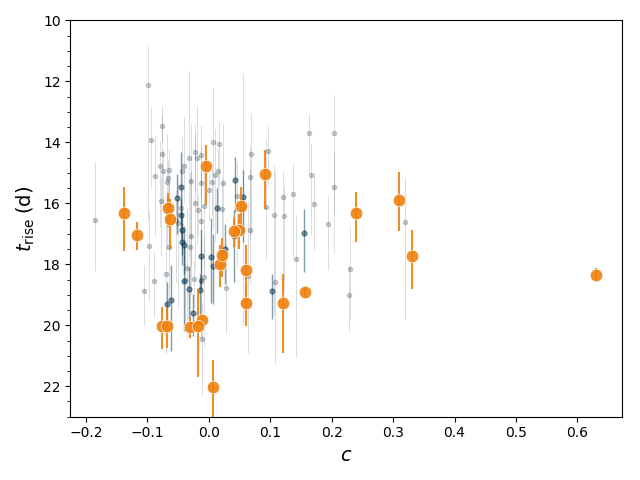

In [26]:
fig, ax = plt.subplots()

#  rise vs. redshift
ax.errorbar(salt_df.c_salt2.values[normal_plot], t_rise[normal_plot], 
             yerr=t_rise_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
ax.errorbar(salt_df.c_salt2.values[normal_good_plot], t_rise[normal_good_plot], 
             yerr=t_rise_unc[:,normal_good_plot], fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
ax.errorbar(salt_df.c_salt2.values[normal_good_host], t_rise[normal_good_host], 
             yerr=t_rise_unc[:,normal_good_host], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

ax.set_ylabel(r'$t_\mathrm{rise}\;(\mathrm{d})$', fontsize=14)
ax.set_ylim(23,10)
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(2))

ax.set_xlabel(r'$c$', fontsize=14)
# ax.set_xlim(-2.3,2.3)
# ax.xaxis.set_minor_locator(MultipleLocator(0.1))
# ax.xaxis.set_major_locator(MultipleLocator(0.5))

fig.tight_layout()

<IPython.core.display.Javascript object>


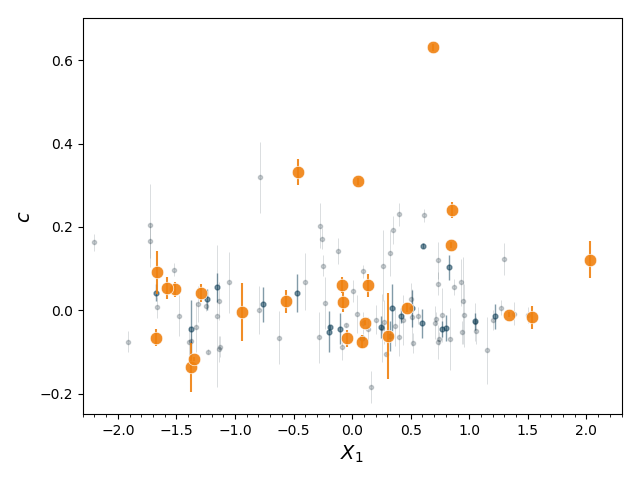

In [27]:
fig, ax = plt.subplots()

#  rise vs. redshift
ax.errorbar(salt_df.x1_salt2.values[normal_plot], salt_df.c_salt2.values[normal_plot], 
             yerr=salt_df.c_salt2_unc.values[normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
ax.errorbar(salt_df.x1_salt2.values[normal_good_plot], salt_df.c_salt2.values[normal_good_plot], 
             yerr=salt_df.c_salt2_unc.values[normal_good_plot], fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
ax.errorbar(salt_df.x1_salt2.values[normal_good_host], salt_df.c_salt2.values[normal_good_host], 
             yerr=salt_df.c_salt2_unc.values[normal_good_host], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

ax.set_ylabel(r'$c$', fontsize=14)
ax.set_ylim(-0.25,0.7)
# ax.yaxis.set_minor_locator(MultipleLocator(0.5))
# ax.yaxis.set_major_locator(MultipleLocator(2))

ax.set_xlabel(r'$X_1$', fontsize=14)
ax.set_xlim(-2.3,2.3)
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.xaxis.set_major_locator(MultipleLocator(0.5))

fig.tight_layout()

## $M_B$ vs. rise time

<IPython.core.display.Javascript object>


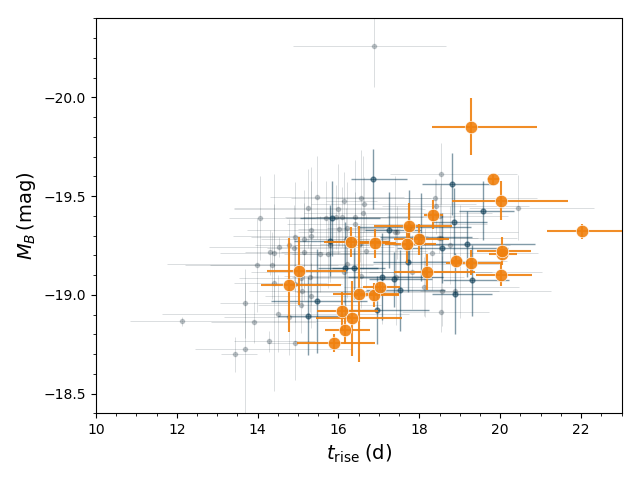

In [39]:
fig, ax = plt.subplots()

#  rise vs. redshift
ax.errorbar(t_rise[normal_plot], salt_df.B_abs0_SALT2corr.values[normal_plot],
            xerr=t_rise_unc[:,normal_plot], 
            yerr=salt_df.B_abs0_unc_SALT2corr.values[normal_plot],
            fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
ax.errorbar(t_rise[normal_good_plot], salt_df.B_abs0_SALT2corr.values[normal_good_plot],
            xerr=t_rise_unc[:,normal_good_plot], 
            yerr=salt_df.B_abs0_unc_SALT2corr.values[normal_good_plot],
            fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
ax.errorbar(t_rise[normal_good_host], salt_df.B_abs0_SALT2corr.values[normal_good_host],
            xerr=t_rise_unc[:,normal_good_host], 
            yerr=salt_df.B_abs0_unc_SALT2corr.values[normal_good_host],
            fmt='o', ms=9,
            color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

ax.set_xlabel(r'$t_\mathrm{rise}\;(\mathrm{d})$', fontsize=14)
ax.set_xlim(10,23)
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(MultipleLocator(2))

ax.set_ylabel(r'$M_B \,(\mathrm{mag})$', fontsize=14)
ax.set_ylim(-18.4,-20.4)
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.5))

fig.tight_layout()

In [34]:
M_B = salt_df.B_abs0_SALT2corr.values

print('Correlating M_B and rise time:')
rho, p = spearmanr(M_B[normal_good_host], t_rise[normal_good_host])
print('\tFor good w/ hosts: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(M_B[normal_good], t_rise[normal_good])
print('\tFor good: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(M_B[normal], t_rise[normal])
print('\tFor all: rho = {:.4f}, p = {:.4f}'.format(rho, p))


print('Correlating M_B and rise time (for good host low-z:')
rho, p = spearmanr(M_B[good_host_low_z], t_rise[good_host_low_z])
print('\tFor good host low-z: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(M_B[good_host_high_z], t_rise[good_host_high_z])
print('\tFor good host high-z: rho = {:.4f}, p = {:.4f}'.format(rho, p))


Correlating M_B and rise time:
	For good w/ hosts: rho = -0.5977, p = 0.0016
	For good: rho = -0.4688, p = 0.0009
	For all: rho = -0.3288, p = 0.0002
Correlating M_B and rise time (for good host low-z:
	For good host low-z: rho = -0.1119, p = 0.7292
	For good host high-z: rho = -0.5714, p = 0.1802
